In [1]:
DATA_DIR = "/media/ashiswin/My Passport/Data Science Bowl 2018/"
TRAIN_DIR = DATA_DIR + "stage1_train/"

# Data Loading

Initially load just 1 dataset

In [2]:
#dataset = TRAIN_DIR + "0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9/"
dataset = TRAIN_DIR + "33618678c167c5e07be02c49d0c43bcd90493ba5d83110a631409a4d3ccc1e51/"
import cv2
import os

img = cv2.imread(dataset + "images/" + os.listdir(dataset + "images")[0], 0)

import matplotlib.pyplot as plt
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

<Figure size 640x480 with 1 Axes>

In [3]:
mask_dir = dataset + "masks/"
masks = os.listdir(mask_dir)

print(masks[1])

8961c355e712d65d9f90386623c8048fc0c9253c8b4a59f84569ed85c35b39d8.png


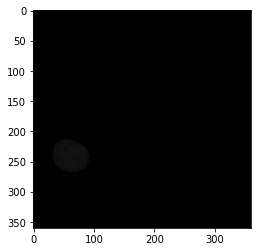

In [4]:
mask = cv2.imread(mask_dir + masks[1], 0)
res = cv2.bitwise_and(img, img, mask = mask)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))
plt.show()

In [5]:
import numpy as np
np.set_printoptions(threshold=np.inf)
print(res)

[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0 

In [6]:
s = "46337 1 46593 4 46849 5 47105 7 47361 9 47617 10 47873 11 48129 11 48385 11 48641 12 48897 12 49153 13 49409 12 49665 12 49921 11 50177 11 50433 10 50689 10 50945 9 51201 9 51457 7 51715 3"
total = 0
for i, n in enumerate(s.split()):
    if i % 2 == 0:
        total += int(n)
print(total)
print(img.shape[0] * img.shape[1])

1078552
129600


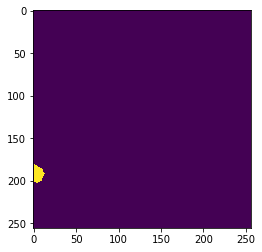

In [7]:
test = np.zeros((256, 256))
arr = s.split()
seq = []
for i, n in enumerate(arr):
    if i % 2 == 1:
        continue
    for j in range(int(arr[i + 1])):
        index = int(arr[i]) + j
        test[index // 256, index % 256] = 255

plt.imshow(test)
plt.show()

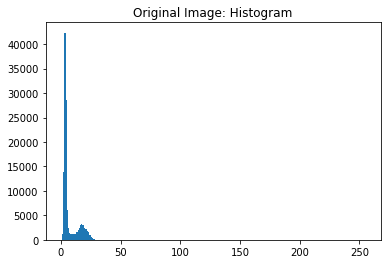

In [8]:
hist = np.histogram(img, bins=256, range=(0.0, 255.0))
plt.hist(img.ravel(), bins=256, range=(0.0, 255.0)),plt.title('Original Image: Histogram')
plt.show()

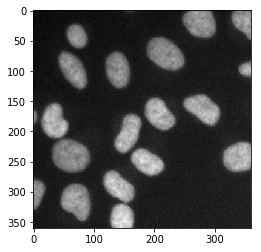

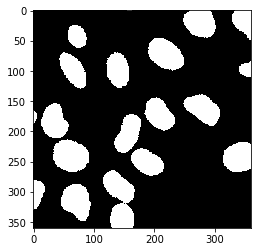

In [22]:
ret,th1 = cv2.threshold(img, 10, 255, cv2.THRESH_BINARY)
plt.imshow(img, cmap='gray')
plt.show()
plt.imshow(th1, cmap='gray')
plt.show()

plt.imsave("/home/ashiswin/Downloads/Image1.jpg", img, cmap='gray')
plt.imsave("/home/ashiswin/Downloads/Image2.jpg", th1, cmap='gray')
# C = 0
# th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
#             cv2.THRESH_BINARY,11,C)
# th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
#             cv2.THRESH_BINARY,11,C)

# plt.imshow(th2, cmap='gray')
# plt.show()
# plt.imshow(th3, cmap='gray')
# plt.show()

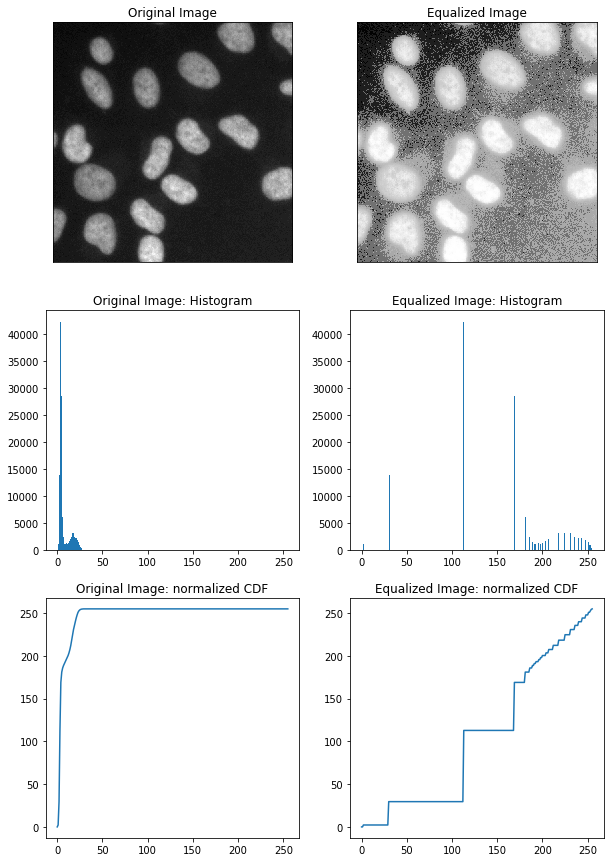

In [16]:
W,H = img.shape
img_eq = cv2.equalizeHist(img)

hist = np.histogram(img, bins=256, range=(0.0, 255.0))
hist_eq = np.histogram(img_eq, bins=256, range=(0.0, 255.0))

plt.figure(figsize=(10,15))
plt.subplot(321),plt.imshow(img, cmap='gray'),plt.title('Original Image'),plt.xticks([]),plt.yticks([]) 
plt.subplot(322),plt.imshow(img_eq, cmap='gray'),plt.title('Equalized Image'),plt.xticks([]),plt.yticks([]) 
plt.subplot(323),plt.hist(img.ravel(), bins=256, range=(0.0, 255.0)),plt.title('Original Image: Histogram')
plt.subplot(324),plt.hist(img_eq.ravel(), bins=256, range=(0.0, 255.0)),plt.title('Equalized Image: Histogram')
plt.subplot(325),plt.plot(range(0,256),np.cumsum(hist[0])*255/(W*H)),plt.title('Original Image: normalized CDF')
plt.subplot(326),plt.plot(range(0,256),np.cumsum(hist_eq[0])*255/(W*H)),plt.title('Equalized Image: normalized CDF')
plt.show()

# ret,th1 = cv2.threshold(img_eq, 235, 255, cv2.THRESH_BINARY)
# plt.imshow(th1, cmap='gray')
# plt.show()

In [17]:
visited = np.zeros(img.shape)
directions = [(1, 0), (-1, 0), (0, 1), (0, -1)]

def dfs(i, j, pixels):
    if i < 0 or i >= th1.shape[0]:
        return
    if j < 0 or j >= th1.shape[1]:
        return
    if visited[i][j] == 1:
        return
    if th1[i][j] == 0:
        return
    pixels.append((i, j))
    visited[i][j] = 1
    for d in directions:
        dfs(i + d[0], j + d[1], pixels)
    
masks = []
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        if th1[i][j] == 255 and visited[i][j] == 0:
            pixels = []
            dfs(i, j, pixels)
            masks.append(pixels)
print(len(masks))

20


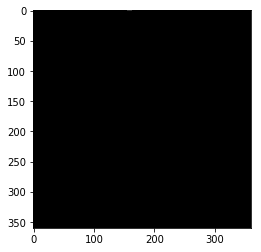

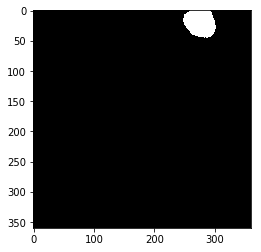

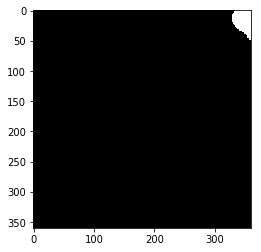

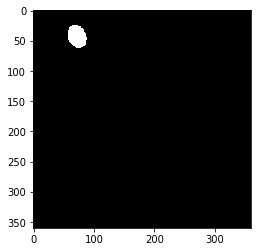

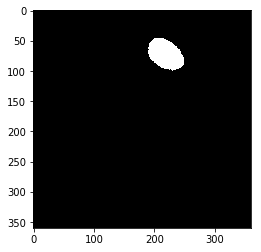

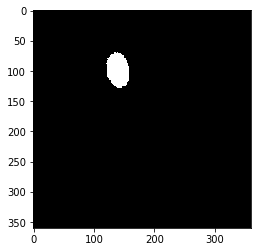

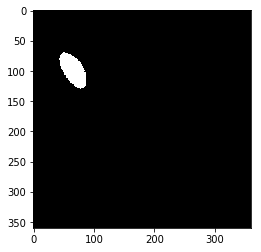

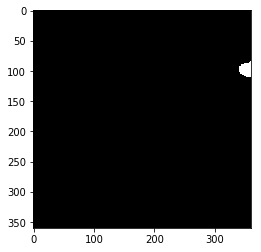

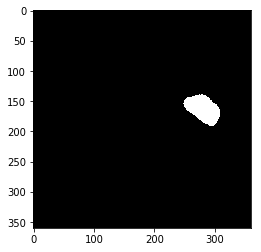

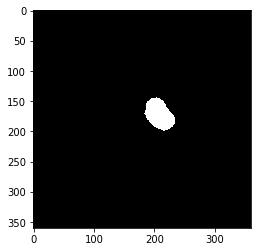

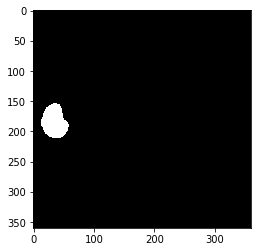

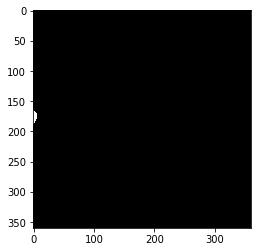

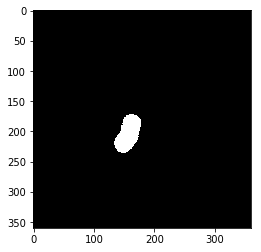

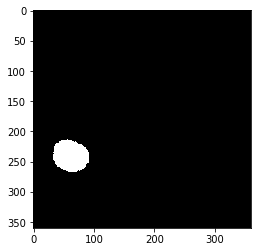

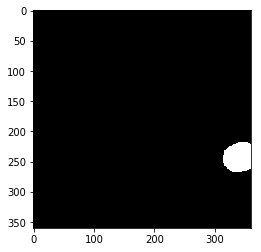

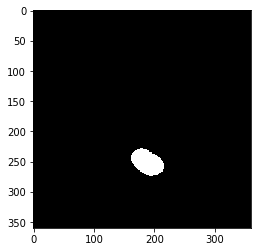

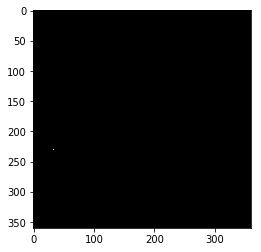

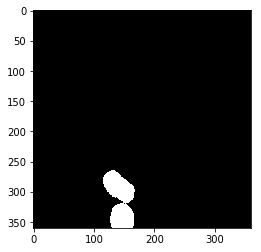

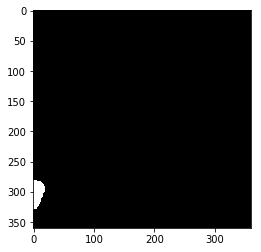

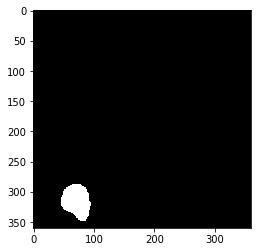

In [18]:
for mask in masks:
    m = np.zeros(th1.shape)
    for p in mask:
        m[p[0], p[1]] = 255
    plt.imshow(m, cmap='gray')
    plt.show()

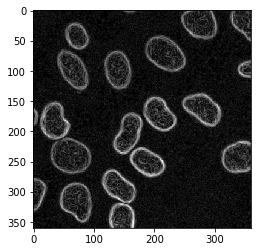

In [15]:
img_flt = img.astype(np.float32)
Kx = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])
dstx = cv2.filter2D(img_flt,-1, Kx)
Ky = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])
dsty = cv2.filter2D(img_flt,-1,Ky)

dst1 = np.sqrt((dstx ** 2) + (dsty ** 2))
plt.imshow(dst1, cmap='gray')
plt.show()